In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
# normalizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# normalizing string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
from sklearn.model_selection import train_test_split

seed = 22
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=seed)

y_train = df_train.defects.values
y_valid = df_valid.defects.values
y_test = df_test.defects.values

df_train.drop(columns=['defects'], inplace=True)
df_valid.drop(columns=['defects'], inplace=True)
df_test.drop(columns=['defects'], inplace=True)

In [5]:
def prepare_input(df: pd.DataFrame):
    copy = df.copy()
    copy.drop(columns=['id'], inplace=True)
    return copy.values

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from typing import Callable

In [7]:
def perform_decision_tree_classification_and_calc_metrics(prepare_input: Callable, max_depth, max_leaf_nodes):
    y_prob = predict_using_decision_tree_classification(max_depth, max_leaf_nodes, prepare_input)

    y_predict = y_prob >= 0.5
    print('accuracy:', round(accuracy_score(y_predict, y_valid), 3))
    print('Precision:', round(precision_score(y_predict, y_valid), 3))
    print('recall:', round(recall_score(y_predict, y_valid), 3))
    print('AUC:', round(roc_auc_score(y_valid, y_prob), 3))
    fpr, tpr, thresholds = roc_curve(y_valid, y_prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')


def predict_using_decision_tree_classification(max_depth, max_leaf_nodes, prepare_input):
    x_train = prepare_input(df_train)
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    model.fit(x_train, y_train)
    x_valid = prepare_input(df_valid)
    y_prob = model.predict_proba(x_valid)[:, 1]
    return y_prob

accuracy: 0.807
Precision: 0.295
recall: 0.683
AUC: 0.773


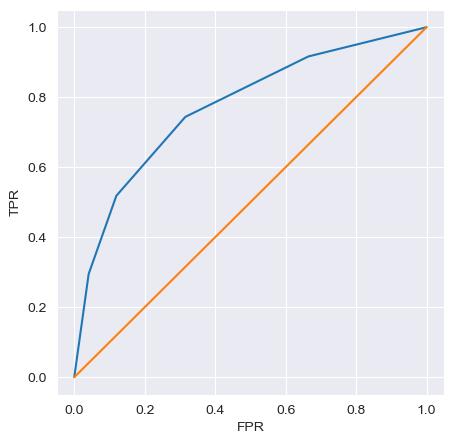

In [8]:
perform_decision_tree_classification_and_calc_metrics(prepare_input, 5, 5)

max_depth=1 	 AUC:0.699
max_depth=2 	 AUC:0.759
max_depth=3 	 AUC:0.777
max_depth=4 	 AUC:0.78
max_depth=5 	 AUC:0.78
max_depth=6 	 AUC:0.781
max_depth=7 	 AUC:0.779
max_depth=8 	 AUC:0.776
max_depth=9 	 AUC:0.771
max_depth=10 	 AUC:0.761
max_depth=11 	 AUC:0.749
max_depth=12 	 AUC:0.736
max_depth=13 	 AUC:0.717
max_depth=14 	 AUC:0.7
max_depth=15 	 AUC:0.679
max_depth=16 	 AUC:0.661
max_depth=17 	 AUC:0.648
max_depth=18 	 AUC:0.635
max_depth=19 	 AUC:0.62
max_depth=20 	 AUC:0.603
max_depth=21 	 AUC:0.59
max_depth=22 	 AUC:0.586
max_depth=23 	 AUC:0.587
max_depth=24 	 AUC:0.584
max_depth=25 	 AUC:0.582
max_depth=26 	 AUC:0.58
max_depth=27 	 AUC:0.577
max_depth=28 	 AUC:0.582
max_depth=29 	 AUC:0.585
max_depth=30 	 AUC:0.588
max_depth=31 	 AUC:0.587
max_depth=32 	 AUC:0.594
max_depth=33 	 AUC:0.593
max_depth=34 	 AUC:0.598
max_depth=35 	 AUC:0.599
max_depth=36 	 AUC:0.601
max_depth=37 	 AUC:0.6
max_depth=38 	 AUC:0.605
max_depth=39 	 AUC:0.604


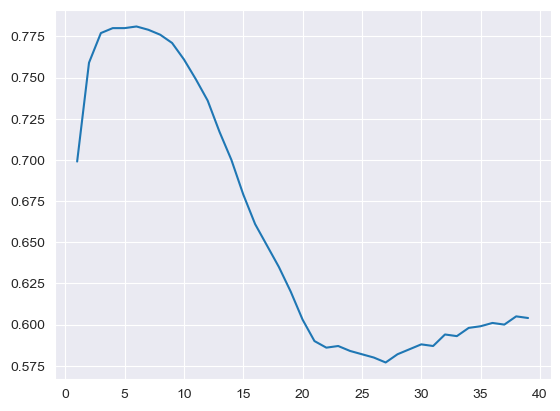

In [9]:
aucs = []
for i in range(1, 40):
    y_prob = predict_using_decision_tree_classification(i, None, prepare_input)
    auc = round(roc_auc_score(y_valid, y_prob), 3)
    print(f'max_depth={i} \t AUC:{auc}')
    aucs.append(auc)
plt.plot(range(1,40), aucs)

In [10]:
aucs_total = []
for i in range(2, 16, 2):
    aucs = []
    for j in range(10, 500, 100):
        y_prob = predict_using_decision_tree_classification(i, j, prepare_input)
        auc = round(roc_auc_score(y_valid, y_prob), 3)
        print(f'max_depth={i} \t max_leaf_nodes:{j} \t AUC:{auc}')
        aucs.append(auc)
    aucs_total.append(aucs)

max_depth=2 	 max_leaf_nodes:10 	 AUC:0.759
max_depth=2 	 max_leaf_nodes:110 	 AUC:0.759
max_depth=2 	 max_leaf_nodes:210 	 AUC:0.759
max_depth=2 	 max_leaf_nodes:310 	 AUC:0.759
max_depth=2 	 max_leaf_nodes:410 	 AUC:0.759
max_depth=4 	 max_leaf_nodes:10 	 AUC:0.78
max_depth=4 	 max_leaf_nodes:110 	 AUC:0.78
max_depth=4 	 max_leaf_nodes:210 	 AUC:0.78
max_depth=4 	 max_leaf_nodes:310 	 AUC:0.78
max_depth=4 	 max_leaf_nodes:410 	 AUC:0.78
max_depth=6 	 max_leaf_nodes:10 	 AUC:0.78
max_depth=6 	 max_leaf_nodes:110 	 AUC:0.781
max_depth=6 	 max_leaf_nodes:210 	 AUC:0.781
max_depth=6 	 max_leaf_nodes:310 	 AUC:0.781
max_depth=6 	 max_leaf_nodes:410 	 AUC:0.781
max_depth=8 	 max_leaf_nodes:10 	 AUC:0.78
max_depth=8 	 max_leaf_nodes:110 	 AUC:0.779
max_depth=8 	 max_leaf_nodes:210 	 AUC:0.776
max_depth=8 	 max_leaf_nodes:310 	 AUC:0.776
max_depth=8 	 max_leaf_nodes:410 	 AUC:0.775
max_depth=10 	 max_leaf_nodes:10 	 AUC:0.78
max_depth=10 	 max_leaf_nodes:110 	 AUC:0.78
max_depth=10 	 max_lea

In [11]:
aucs_total

[[0.759, 0.759, 0.759, 0.759, 0.759],
 [0.78, 0.78, 0.78, 0.78, 0.78],
 [0.78, 0.781, 0.781, 0.781, 0.781],
 [0.78, 0.779, 0.776, 0.776, 0.775],
 [0.78, 0.78, 0.771, 0.77, 0.765],
 [0.78, 0.779, 0.771, 0.766, 0.762],
 [0.78, 0.779, 0.769, 0.763, 0.757]]

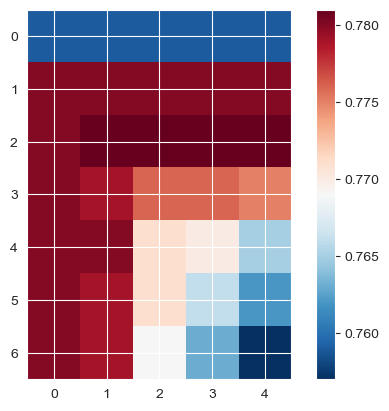

In [12]:
plt.imshow(aucs_total, cmap="RdBu_r")
plt.colorbar()

In [13]:
max_depth = 15
max_leaf_nodes = 100
y_prob = predict_using_decision_tree_classification(max_depth, max_leaf_nodes, prepare_input)
auc = round(roc_auc_score(y_valid, y_prob), 4)
print(auc)

0.779


In [14]:
x_train = prepare_input(df_train)
model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
model.fit(x_train, y_train)
x_test = prepare_input(df_test)
y_prob = model.predict_proba(x_test)[:, 1]
auc = round(roc_auc_score(y_test, y_prob), 4)
print(auc)

0.7838


In [15]:
df_submit = pd.read_csv('data/test.csv')

In [16]:
x_train = prepare_input(df_train)
model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
model.fit(x_train, y_train)
x_submit = prepare_input(df_submit)
y_prob = model.predict_proba(x_submit)[:, 1]

In [17]:
pd.DataFrame(data=y_prob, columns=['defects']).reset_index().rename(columns={'index': 'id'}).to_csv('data/res.csv', index=False)

In [18]:
df_submit

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [20]:
df_submit['defects'] = y_prob

In [23]:
df_submit = df_submit[['id','defects']]
df_submit.to_csv('data/res.csv', index=False)